In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
#loading dataset in data variable
data=pd.read_csv("C:\Users\kanak\Desktop\ML_Model\diabetes_pred\diabetes.csv")

In [ ]:
#checking the basic structure of data 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [ ]:
#splitting the dataset in training and testing sets so that data leakage doesn't 
#happen while applying preprocessing steps 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(max_iter=1000,
                                solver='saga',
                                penalty='l2',
                                verbose=1,
                                n_jobs=-1,
                                class_weight='balanced'
                               ))
])

# hyperparameter tuning:regularization for best results
param_grid={
    'model__C':[0.01,0.1,1,10,100],  #regularization strength
}
# using GridSearchCV to try all these hyperparameters and then select the one with best result 

grid=GridSearchCV(
    pipeline,   # the pipeline we need to tune
    param_grid, #the hyperparameters and values to try 
    cv=5,       #5-fold cross validation 
    scoring='roc_auc',  #metrics to decide the best hyperparameter 
    n_jobs=-1       # use all cpu cores
)

In [ ]:
grid.fit(x_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Using

Epoch 1, change: 1
Epoch 1, change: 1
Epoch 2, change: 0.21711823
Epoch 2, change: 0.17999267
Epoch 3, change: 0.14966015
Epoch 3, change: 0.081849979
Epoch 4, change: 0.14607774
Epoch 4, change: 0.05527055
Epoch 5, change: 0.055550901
Epoch 5, change: 0.036344585
Epoch 6, change: 0.0347555
Epoch 7, change: 0.012706925
Epoch 8, change: 0.0032946227
Epoch 9, change: 0.0012146819
Epoch 10, change: 0.00074640165
Epoch 1, change: 1
Epoch 11, change: 0.00067950305
Epoch 2, change: 0.18137919
Epoch 12, change: 0.00026794385
Epoch 3, change: 0.070435652
Epoch 13, change: 0.00010087668
Epoch 4, change: 0.063407637
convergence after 14 epochs took 0 seconds
Epoch 5, change: 0.022635922
Epoch 6, change: 0.04087151
Epoch 6, change: 0.015004748
Epoch 7, change: 0.020232247
Epoch 7, change: 0.018610657
Epoch 8, change: 0.0061030418
Epoch 8, change: 0.0077587243
Epoch 9, change: 0.0023380298
Epoch 9, change: 0.0025050503
Epoch 10, change: 0.003829644
Epoch 10, change: 0.0014055476
Epoch 11, change: 

,estimator,Pipeline(step... verbose=1))])
,param_grid,"{'model__C': [0.01, 0.1, ...]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


In [ ]:
print("Best regularization (C):", grid.best_params_)
print("Best cross-validation ROC-AUC:", grid.best_score_)


Best regularization (C): {'model__C': 0.1}
Best cross-validation ROC-AUC: 0.8311683277962347


In [ ]:
y_pred=grid.predict(x_test)
y_proba = grid.predict_proba(x_test)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154

Test ROC-AUC: 0.8211111111111111
Confusion Matrix:
 [[75 25]
 [15 39]]


In [ ]:
import pandas as pd

coefficients = grid.best_estimator_.named_steps['model'].coef_[0]
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance)


                    Feature  Coefficient
1                   Glucose     0.968435
5                       BMI     0.626740
0               Pregnancies     0.326831
6  DiabetesPedigreeFunction     0.267919
7                       Age     0.239785
2             BloodPressure    -0.143734
4                   Insulin    -0.058011
3             SkinThickness     0.040716


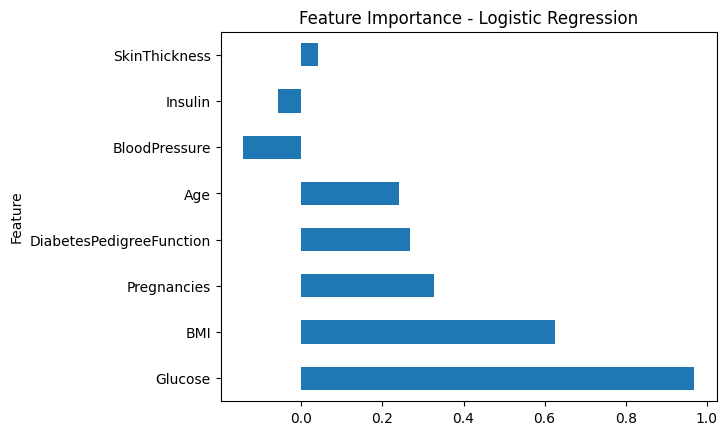

In [ ]:
import matplotlib.pyplot as plt
feature_importance.plot(x='Feature', y='Coefficient', kind='barh', legend=False)
plt.title('Feature Importance - Logistic Regression')
plt.show()


In [ ]:
import joblib
joblib.dump(grid.best_estimator_, 'logreg_pipeline_diabetes.pkl')


['logreg_pipeline_diabetes.pkl']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using your feature_importance dataframe
plt.figure(figsize=(8,5))
sns.heatmap(feature_importance.set_index('Feature').T, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Importance - Logistic Regression Coefficients')
plt.show()


In [ ]:
sns.heatmap(data.corr(),annot=True)